In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv("data.csv")

In [54]:
df.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [55]:
df.drop(columns=["SNo"], inplace=True)

In [56]:
df.columns = ['A' , "B" , "C"]

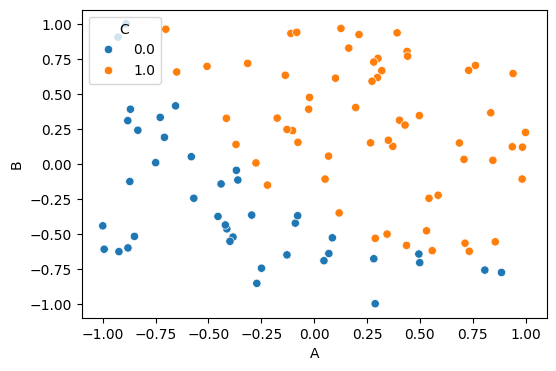

In [57]:
# ploting the graph
plt.figure(figsize=(6,4))
sns.scatterplot(data=df , x="A" , y="B" , hue='C')
plt.show()

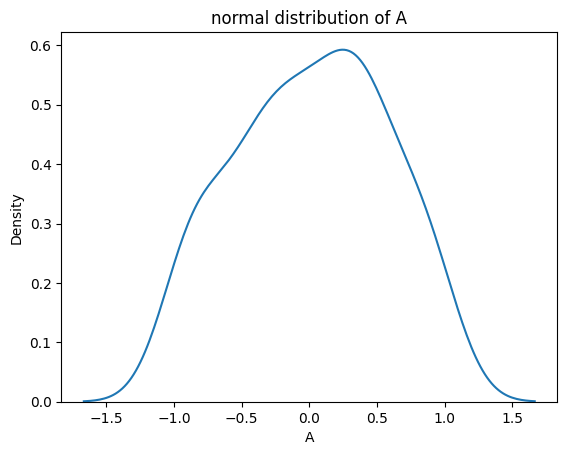

In [58]:
# now we draw the graph for checking the linearity of the data
plt.title("normal distribution of A")
sns.kdeplot(data=df , x="A")
plt.show()

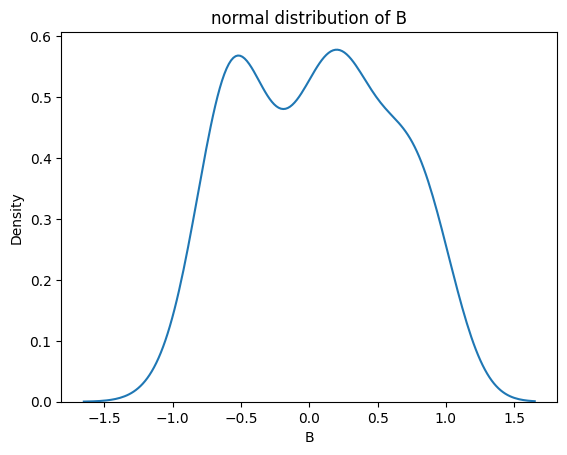

In [59]:
plt.title("normal distribution of B")
sns.kdeplot(data=df , x="B")
plt.show()

from the normal distrubution we have seen that we apply gaussian naive baise because data is normaly distributed


In [60]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [64]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


Accuracy: 0.9

Confusion Matrix:
 [[10  1]
 [ 2 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.94      0.89      0.92        19

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



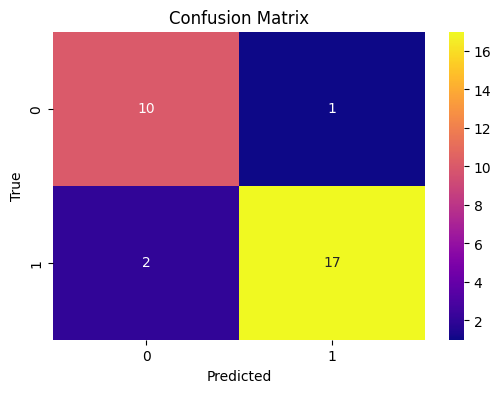

In [65]:
# prompt: generate the gaussian naive baise model and train and test with the above data set and return the accuracy report and probability also , draw the confusion matrix also

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Get predicted probabilities
y_prob = model.predict_proba(x_test)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


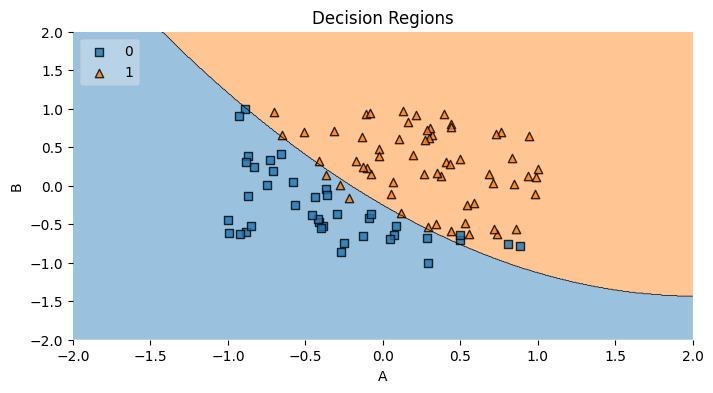

In [66]:
# prompt: draw the graph using the mlextend after the model training by converting the values into the numpy array

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Train the model again for plotting
model.fit(x, y)

# Assuming 'x' has two features, extract them for plotting
X = df[['A', 'B']].values
y = y = df['C'].values.astype(np.int_)

# Plot decision regions
plt.figure(figsize=(8, 4))
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Decision Regions')
plt.show()
